In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def map_image(image, label):
    image = tf.cast(image, dtype=tf.float32)
    image /= 255.0
    image = tf.reshape(image, shape=(784,))
    
    return image, image

In [6]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load("mnist", as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load("mnist", as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

# Build the model

In [15]:
def deep_autoencoder():
    encoder = tf.keras.layers.Dense(units=128, activation="relu")(inputs)
    encoder = tf.keras.layers.Dense(units=64, activation="relu")(encoder)
    encoder = tf.keras.layers.Dense(units=32, activation="relu")(encoder)
    
    decoder = tf.keras.layers.Dense(units=64, activation="relu")(encoder)
    decoder = tf.keras.layers.Dense(units=128, activation="relu")(decoder)
    decoder = tf.keras.layers.Dense(units=784, activation="sigmoid")(decoder)
    
    return encoder, decoder

In [16]:
inputs = tf.keras.layers.Input(shape=(784,))

encoder_output, autoencoder_output = deep_autoencoder()

encoder_model = tf.keras.Model(inputs=inputs, outputs=encoder_output)
autoencoder_model = tf.keras.Model(inputs=inputs, outputs=autoencoder_output)

In [17]:
train_steps= 60000 // BATCH_SIZE

autoencoder_model.compile(
    optimizer="adam",
    loss=tf.keras.losses.binary_crossentropy
)

autoencoder_model.summary()

autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               1011

In [20]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

1/1 [==============================] - 0s 36ms/step


2024-05-23 10:13:40.790644: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-05-23 10:13:40.869435: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-05-23 10:13:40.910090: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. I

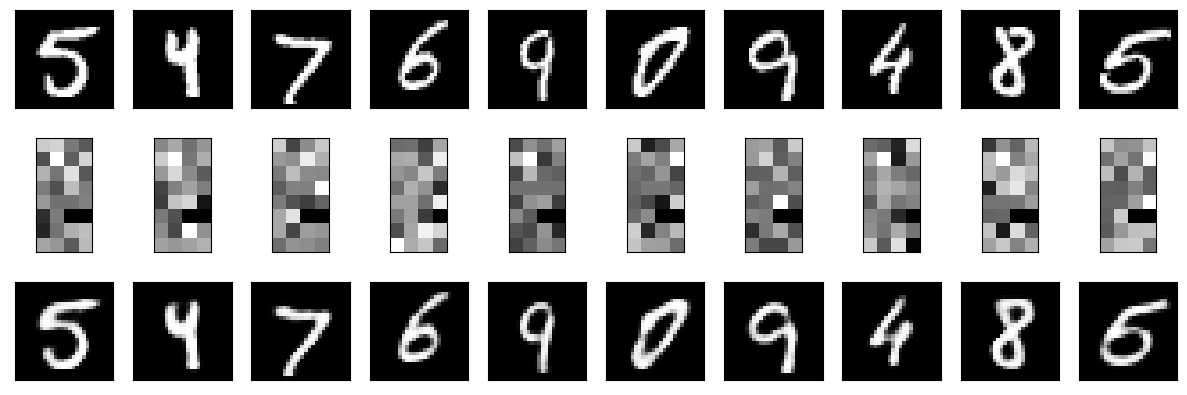

In [22]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = encoder_model.predict(test_dataset)

# get a prediction for the test batch
deep_predicted = autoencoder_model.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], deep_predicted[idxs])